In [21]:
#workon deepfake env...
from fastai.vision import *
import os
import numpy as npfrom

In [22]:
path_img='/media/csaba/ExtraDrive11/Tracking_alyssa_puno/denoising/for_training_unet/'
path_label='/media/csaba/ExtraDrive11/Tracking_alyssa_puno/denoising/masks_Unet/' #labels must be contiguous!0,1,..
#not 0,255 in the pngs.

get_label=lambda x: './masks_Unet/'+x.stem+x.suffix


In [23]:
src=(SegmentationItemList.from_folder(path_img,convert_mode='L')
    .split_by_idx(np.arange(30))
    .label_from_func(func=get_label,classes=['bg','cell'],convert_mode='L'))
bs=4
data = (src.transform(get_transforms(), tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats)) #if you don't normalize, learner still thinks it's a 3 channel img. this tells it it is 1 dim

def acc_camvid(input, target):
    target = target.squeeze(1)
    return (input.argmax(dim=1)==target).float().mean()


In [24]:
learn = unet_learner(data, models.resnet34, metrics=acc_camvid, wd=1e-2)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


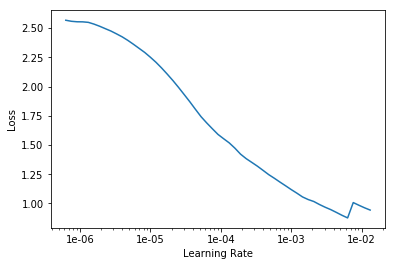

In [25]:
learn.lr_find() # find learning rate
learn.recorder.plot() # plot learning rate graph

In [28]:
learn.fit(epochs=30,lr=7e-3)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.124838,0.104129,0.961643,00:00
1,0.128513,0.093822,0.958645,00:00
2,0.118022,0.096350,0.957845,00:00
3,0.110073,0.076158,0.966850,00:00
4,0.104464,0.072986,0.967236,00:00
5,0.099186,0.063365,0.971665,00:00
6,0.093720,0.060859,0.974017,00:00
7,0.091569,0.055619,0.975684,00:00
8,0.087916,0.053630,0.976184,00:00
9,0.084496,0.053090,0.976843,00:00


In [52]:
img=open_image('test.png')
predicted=learn.predict(img)

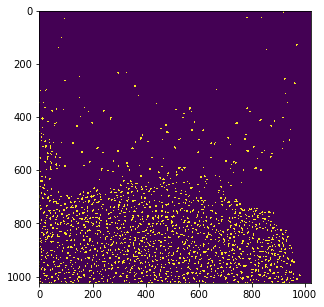

In [53]:
plt.figure(figsize=(5,5))
plt.imshow(np.asarray(learn.predict(img)[1].detach())[0,:,:])

In [54]:
help(learn.pred_batch)

Help on method pred_batch in module fastai.basic_train:

pred_batch(ds_type:fastai.basic_data.DatasetType=<DatasetType.Valid: 2>, batch:Tuple=None, reconstruct:bool=False, with_dropout:bool=False, activ:torch.nn.modules.module.Module=None) -> List[torch.Tensor] method of fastai.basic_train.Learner instance
    Return output of the model on one batch from `ds_type` dataset.

